Micromagnetic standard problem 4
=============================

The Problem specification can be found on https://www.ctcms.nist.gov/~rdm/mumag.org.html



In [1]:
from mumax5.engine import *
from mumax5.util import show_field

import matplotlib.pyplot as plt
import numpy as np

Construct a world containing a single magnet with the dimensions mentioned in the problem specification.

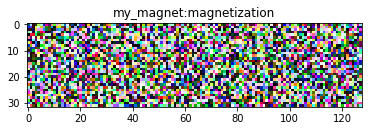

In [2]:
length, width, thickness = 500e-9, 125e-9, 3e-9
nx, ny, nz = 128, 32, 1

world = World( cellsize=(length/nx, width/ny, thickness/nz) )

magnet = world.add_ferromagnet( grid=Grid((nx, ny, nz)), name="my_magnet" )

magnet.msat = 800e3
magnet.aex = 13e-12
magnet.alpha = 0.02

show_field( magnet.magnetization )

Relax the magnetization to an 'S' state in the x direction.

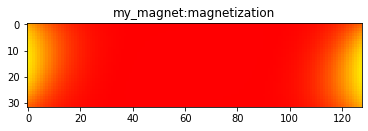

In [3]:
magnet.magnetization = (1, 0.1, 0)
magnet.minimize()

show_field( magnet.magnetization )

Apply one of the two external fields mentioned in the problem specification.

In [4]:
world.bias_magnetic_field = (-24.6e-3, 4.3e-3, 0)
#world.bias_magnetic_field = (-35.5e-3, -6.3e-3, 0)

Schedule the output by defining a list of timepoints and a table of quantities.

In [5]:
timepoints = np.linspace(0, 1e-9, 200)

table = Table()
table.add("mx", magnet.magnetization, 0)
table.add("my", magnet.magnetization, 1)
table.add("mz", magnet.magnetization, 2)
table.add("e_total", magnet.total_energy_density, 0)
table.add("e_exchange", magnet.exchange_energy_density, 0)
table.add("e_zeeman", magnet.zeeman_energy_density, 0)
table.add("e_demag", magnet.demag_energy_density, 0)

Run a timesolve to evaluate the table quantities at the given time points

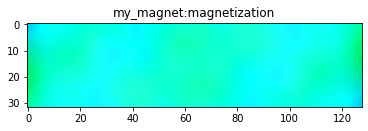

In [6]:
solver = TimeSolver(magnet.magnetization, magnet.torque)
solver.solve(timepoints, table)

show_field( magnet.magnetization )

Plot the average magnetization in time.

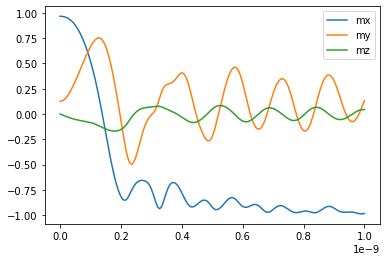

In [7]:
for key in ["mx", "my", "mz"]:
    plt.plot(timepoints, table[key], label=key)

plt.legend()
plt.show()

Plot the average energy densities

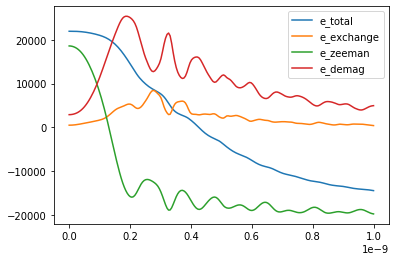

In [8]:
for key in ["e_total", "e_exchange", "e_zeeman", "e_demag"]:
    plt.plot(timepoints, table[key], label=key)

plt.legend()
plt.show()